In [1]:
import h5py
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
sys.path.append('/Users/smil/Projects/cato/scripts/')
from load_datasets import load_1d_dataset
sns.set_context('talk')
import pint
current_palette = sns.color_palette()
ureg = pint.UnitRegistry()

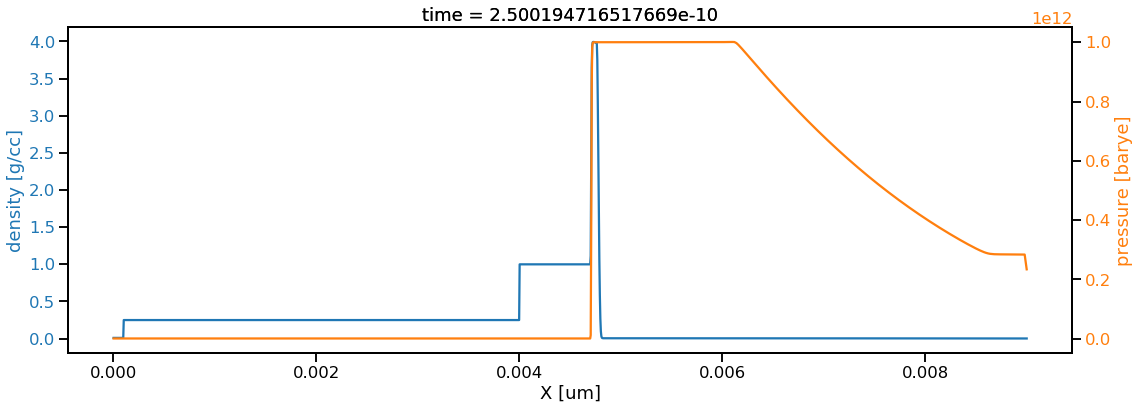

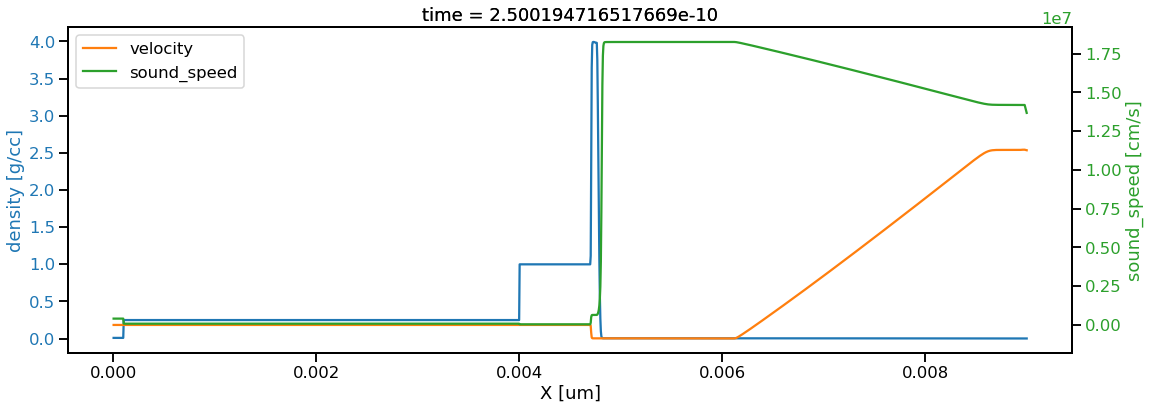

In [270]:
ds = load_1d_dataset(folder='.', units='cgs')


fig, ax1 = plt.subplots(figsize=(18,6))
ax2 = ax1.twinx()
t =-1

for ax,c,v in zip([ax1, ax2], 
                current_palette[0:2],
               ['density', 'pressure']):
    ds[v][t].plot(ax=ax, color=c)
    ax.tick_params(axis='y', labelcolor=c)
    ax.yaxis.label.set_color(c)
ax1.set_xlabel('X [um]')
plt.show()


fig, ax1 = plt.subplots(figsize=(18,6))
ax2 = ax1.twinx()
for ax,c,v in zip([ax1, ax2, ax2], 
                   current_palette[0:3],
                  ['density', 'velocity', 'sound_speed']):
    ds[v][t].plot(ax=ax, color=c, label=v)
    ax.tick_params(axis='y', labelcolor=c)
    ax.yaxis.label.set_color(c)
# ax2.set_yscale('log')
plt.legend()
ax1.set_xlabel('X [um]')
plt.show()


In [251]:
ds.pressure[-1]

<xarray.DataArray 'pressure' (x: 1200)>
array([1.00000000e+09, 1.00000000e+09, 1.00000000e+09, ...,
       1.74671349e+11, 1.73193466e+11, 1.42049180e+11])
Coordinates:
    time     float64 6.001e-10
  * x        (x) float64 5e-06 1e-05 1.5e-05 2e-05 ... 0.00896 0.00898 0.009
Attributes:
    units:    barye

In [236]:
ds['mach_number'] = abs(ds.velocity)/ds.sound_speed

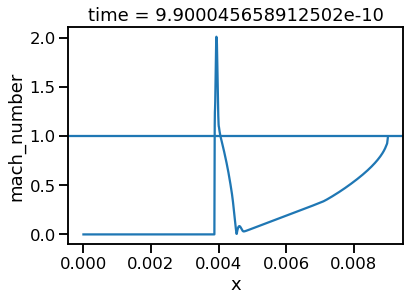

In [238]:
ds.mach_number[-1].plot()
plt.axhline(1)

In [191]:
gamma = 5./3.
cell_1 = [ 1.813E-05, 6.867E+07, 1.234E-07, 3.553E+13]

cs_1 = np.sqrt(gamma * cell_1[3] / cell_1[0])
print(f"{cs_1:.2e}")
cell_2 = [ 3.024E-10,-2.158E+09,-1.234E-07, 1.000E+08]
cs_2 = np.sqrt(gamma * cell_2[3] / cell_2[0])
print(f"{cs_2:.2e}")


1.81e+09
7.42e+08


In [197]:
cell_1 = [ 2.389E-04, 6.452E+09, 4.243E-07, 1.050E+17]
cell_2 = [ 4.675E-11,-6.427E+10,-4.243E-07, 1.000E+10]
gamma = 5./3.
cs_1 = np.sqrt(gamma * cell_1[3] / cell_1[0])
cs_2 = np.sqrt(gamma * cell_2[3] / cell_2[0])
print(f"{cs_1:.2e}")
print(f"{cs_2:.2e}")

2.71e+10
1.89e+10


In [203]:
gamma = 5./3.
p = 1e4
rho = 2.389E-04  # .005
cs = np.sqrt(gamma * p / rho)
print(f"Cs: {cs:.4e}")

# gamma = 5./3.
# p = 1e9
# rho = .001
# cs = np.sqrt(gamma * p / rho)
# print(f"Cs: {cs:.4e}")

Cs: 8.3525e+03


In [ ]:
((50e-12)*ureg.seconds).to('ps')

In [ ]:
gamma=5.0/3.0
P1=1e7
P2=1e8
rho2=.001

rho1 = rho2*(P2/P1)**(1/gamma)
rho1

In [ ]:
pulse = np.loadtxt('pressure_input.dat')

data = (pulse[:,0] * ureg('ns')).to('s').m
power = (pulse[:,1] * ureg('Mbar')).to('barye').m
for d,p in zip(data, power):
    print(f"{d:.3e} {p:.3e}")

In [ ]:
theta_ib = np.pi/2.0
theta_ie = 0
# np.cos(theta_ie) - np.cos(theta_ib)
np.sin(theta_ie) - np.sin(theta_ib)

In [ ]:
np.sin(np.pi)